# Atividade 3 - parte 1
Alunas: Bianca Bonetti Nunes e Bianca Suganuma Cadamura

### Criando valores aleatórios para a radiação, cobertura de nuvens e velocidade do vento


In [66]:
import pandas as pd
import numpy as np

# Gerar um intervalo de datas para o ano de 2023
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Criar DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Extrair o dia do ano das datas e adicioná-lo como uma nova coluna no DataFrame
df['Dia_do_Ano'] = df['Data'].dt.dayofyear

# Expandir as datas para incluir as horas do dia (1 a 24)
df_expandido = df.loc[df.index.repeat(24)].reset_index(drop=True)
df_expandido['Hora_Dia'] = [hora for _ in range(len(df)) for hora in range(1, 25)]

In [67]:
# Parâmetros de aleatoriedade para radiação, cobertura de nuvens e velocidade do vento
radMax = 1000
radMin = 1

cobertura_de_nuvensMax = 100
cobertura_de_nuvensMin = 0

veloc_ventoMax = 11.31
veloc_ventoMin = 0

# Número de linhas/número de datas
n = df_expandido.shape[0]

# Criar valores aleatórios
radiacao = (radMax - radMin) * np.random.rand(n) + radMin
cobertura_de_nuvens = (cobertura_de_nuvensMax - cobertura_de_nuvensMin) * np.random.rand(n) + cobertura_de_nuvensMin
veloc_vento = (veloc_ventoMax - veloc_ventoMin) * np.random.rand(n) + veloc_ventoMin

# Adicionar as colunas ao DataFrame
df_expandido['Radiacao'] = radiacao
df_expandido['Cobertura_de_Nuvens'] = cobertura_de_nuvens
df_expandido['Veloc_Vento'] = veloc_vento


In [68]:
df_expandido

,Data,Mes,Dia_do_Ano,Hora_Dia,Radiacao,Cobertura_de_Nuvens,Veloc_Vento
0,2023-01-01,1,1,1,105.313629,46.187280,9.468188
1,2023-01-01,1,1,2,307.543439,90.828325,7.784984
2,2023-01-01,1,1,3,81.987169,5.506135,5.303498
3,2023-01-01,1,1,4,133.563513,93.679173,1.737514
4,2023-01-01,1,1,5,9.907413,17.315264,2.803420
...,...,...,...,...,...,...,...
8755,2023-12-31,12,365,20,271.341243,79.898486,9.968434
8756,2023-12-31,12,365,21,402.796930,74.027109,8.395599
8757,2023-12-31,12,365,22,846.912850,72.156802,2.192910
8758,2023-12-31,12,365,23,730.660206,93.005528,5.033044


### 1. Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas

In [69]:
# Função para determinar a classe de estabilidade
def classe_estabilidade(hora_dia, radiacao, cobertura_de_nuvens, veloc_vento):
    if hora_dia < 6 or hora_dia >= 18:
        # Condições noturnas
        if cobertura_de_nuvens >= 5:
            if 2 <= veloc_vento <= 3:
                return "E"
            else:
                return "D"
        else:
            if 2 <= veloc_vento < 3:
                return "F"
            elif 3 <= veloc_vento <= 5:
                return "E"
            else:
                return "D"
    else:
        # Condições diurnas
        if radiacao > 700:  # Radiação solar forte
            if veloc_vento < 2:
                return "A"
            elif 2 <= veloc_vento <= 5:
                return "B"
            else:
                return "C"
        elif 350 <= radiacao <= 700:  # Radiação solar moderada
            if veloc_vento < 3:
                return "B"
            elif 3 < veloc_vento <= 5:
                return "C"
            else:
                return "D"
        else:  # Radiação solar fraca
            if veloc_vento < 2:
                return "B"
            elif 2 <= veloc_vento <= 3:
                return "C"
            elif 3 < veloc_vento <= 5:
                return "C"
            elif 5 < veloc_vento <= 6:
                return "C"
            else:
                return "D"

# Aplicar a função para cada linha do DataFrame
df_expandido['Classe_Estabilidade'] = df_expandido.apply(
    lambda row: classe_estabilidade(
        row['Hora_Dia'],
        row['Radiacao'],
        row['Cobertura_de_Nuvens'],
        row['Veloc_Vento']
    ), axis=1
)

# Verificar o DataFrame expandido
print(df_expandido)


           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  105.313629            46.187280   
1    2023-01-01    1           1         2  307.543439            90.828325   
2    2023-01-01    1           1         3   81.987169             5.506135   
3    2023-01-01    1           1         4  133.563513            93.679173   
4    2023-01-01    1           1         5    9.907413            17.315264   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  271.341243            79.898486   
8756 2023-12-31   12         365        21  402.796930            74.027109   
8757 2023-12-31   12         365        22  846.912850            72.156802   
8758 2023-12-31   12         365        23  730.660206            93.005528   
8759 2023-12-31   12         365        24  421.330867            25.657360   

      Veloc_Vento Classe_Estabilidade  
0        9.

### 2. Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade

In [70]:
# Cria uma lista de valores de 0 a 50000 em incrementos de 1000
x_values = list(np.arange(0, 50001, 1000))
x_values[0] = 1
# Função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(classe, x, urbOrRural):
    if urbOrRural == 'urbano':
        if classe in ['A', 'B']:
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** (0.5)
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe in ['E', 'F']:
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0015 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0002 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0015 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada. Fique ligado')
    else:
        raise ValueError('Tipo de área errada')
    return sigmaY, sigmaZ

# Define o tipo de área
urbOrRural = 'urbano'
sY = np.zeros((df_expandido.Classe_Estabilidade.shape[0],len(x_values)))
sZ = np.zeros((df_expandido.Classe_Estabilidade.shape[0],len(x_values)))
for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    for jj in range (0, len(x_values)):
        sigmaY,sigmaZ = sigmaXY(df_expandido.Classe_Estabilidade[ii],x_values[jj],urbOrRural)
        sY[ii,jj]=sigmaY
        sZ[ii,jj]=sigmaZ


In [71]:
index = 0
for gg in range (0, len(x_values)):
    colunaY = ('sigmaY_'+str(index))
    colunaZ = ('sigmaZ_'+str(index))
    df_expandido[str(colunaY)] = sY[:,gg]
    df_expandido[str(colunaZ)] = sZ[:,gg]
    index = index +1000

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_19096\4144416122.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[str(colunaZ)] = sZ[:,gg]
C:\Users\BiaBN\AppData\Local\Temp\ipykernel_19096\4144416122.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[str(colunaY)] = sY[:,gg]
C:\Users\BiaBN\AppData\Local\Temp\ipykernel_19096\4144416122.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

In [72]:
print(df_expandido)
#Salvar o DataFrame em um arquivo CSV
df_expandido.to_csv(r'C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\estabilidade.csv')

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  105.313629            46.187280   
1    2023-01-01    1           1         2  307.543439            90.828325   
2    2023-01-01    1           1         3   81.987169             5.506135   
3    2023-01-01    1           1         4  133.563513            93.679173   
4    2023-01-01    1           1         5    9.907413            17.315264   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  271.341243            79.898486   
8756 2023-12-31   12         365        21  402.796930            74.027109   
8757 2023-12-31   12         365        22  846.912850            72.156802   
8758 2023-12-31   12         365        23  730.660206            93.005528   
8759 2023-12-31   12         365        24  421.330867            25.657360   

      Veloc_Vento Classe_Estabilidade  sigmaY_0  si

### 3. Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs. Deve ser considerado o efeito Tip-Downwash

In [73]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonBryant(d,vs,u,Ts,Tamb):
    deltaH = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Ts)
    return deltaH

In [74]:
# Função para estimar o deltaH com base na equação de Holland
def deltaHHolland(d,vs,u,p,Ts,Tamb):
    deltaH = ((vs*d/u)*(1.5+2.68*10^(-3)*p*(Ts-Tamb)*d/Ts))
    return deltaH

In [75]:
# Função para estimar o deltaH com base na equação de Briggs
def deltaHBriggs(d,vs,Ts,Tamb,classe,u):
    Fb = 9.8*((d/2)**2)*vs*(1-Tamb/Ts)
    if classe == 'A':
        gradT = -0.02 + 0.0098
    elif classe == 'B':
        gradT = -0.018 + 0.0098 
    elif classe == 'C':
        gradT = -0.016 + 0.0098 
    elif classe == 'D':
        gradT = -0.01 + 0.0098 
    elif classe == 'E':
        gradT = 0.005 + 0.0098 
    elif classe == 'F':
        gradT = 0.028 + 0.0098 
    else:
        print('Classe de estabilidade errada')
    s = (9.8/Tamb)*(gradT)
    if classe == 'A' or classe == 'B' or classe == 'C' or classe == 'D':
        if Fb < 55:
            deltaTc = 0.0297*Ts*(vs**(1/3))/(d**(2/3))
            if (Ts - Tamb) < deltaTc:
                deltaH = 3*d*vs/u
            else:
                deltaH = 21.425*Fb**(3/4)/u
        else:
            deltaTc = 0.0057*Ts*(vs**(2/3)/d**(1/3))
            if (Ts - Tamb) < deltaTc:
                deltaH = 3*d*vs/u
            else:
                deltaH = 2.6*(Fb/(u*s))**(1/3)
    elif classe == 'E' or classe == 'F':
        deltaTc = 0.019582*Ts*vs*s**(1/2)
        if (Ts - Tamb) < deltaTc:
            Fm = (vs**2)*(d**2)*Tamb/(4*Ts) 
            deltaH1 = 1.5*(Fm/(u*s**(1/2)))**(1/3)
            deltaH2 = 3*d*vs/u
            if deltaH1 > deltaH2:
                deltaH = deltaH2
            else:
                deltaH = deltaH1
        else:
            deltaH = 2.6*(Fb/(u*s))**(1/3)
    return deltaH

### Utilizando o modelo de Briggs para calcular deltaH

In [76]:
d = 1 #diametro da chaminé
vs = 20 #velociadade na saida da chaminé
Ts = 400 # em Kelvin
Tamb = 293 # em Kelvin

dH = np.zeros((df_expandido.Classe_Estabilidade.shape[0]))
for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,df_expandido.Classe_Estabilidade[ii],df_expandido.Veloc_Vento[ii])
    dH[ii] = deltaH
df_expandido['deltaH'] = dH
print(df_expandido)

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  105.313629            46.187280   
1    2023-01-01    1           1         2  307.543439            90.828325   
2    2023-01-01    1           1         3   81.987169             5.506135   
3    2023-01-01    1           1         4  133.563513            93.679173   
4    2023-01-01    1           1         5    9.907413            17.315264   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  271.341243            79.898486   
8756 2023-12-31   12         365        21  402.796930            74.027109   
8757 2023-12-31   12         365        22  846.912850            72.156802   
8758 2023-12-31   12         365        23  730.660206            93.005528   
8759 2023-12-31   12         365        24  421.330867            25.657360   

      Veloc_Vento Classe_Estabilidade  sigmaY_0  si

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_19096\1391082514.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido['deltaH'] = dH


### 4. Implementar a função do modelo gaussiano

In [77]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

### 5. Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

In [78]:
# Estimando a sobrelevação da pluma (deltaH)
hg = 100 #altura da chaminé
Hefetiva = np.zeros((df_expandido.Classe_Estabilidade.shape[0]))

for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    if vs>1.5*(df_expandido['Veloc_Vento'][ii]):
        Hefetiva[ii] = hg+(df_expandido['deltaH'][ii])
    else:
        Hefetiva[ii] = hg +2*d*((vs/u)-1.5)
df_expandido['Hefetiva'] = Hefetiva
print(df_expandido)

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  105.313629            46.187280   
1    2023-01-01    1           1         2  307.543439            90.828325   
2    2023-01-01    1           1         3   81.987169             5.506135   
3    2023-01-01    1           1         4  133.563513            93.679173   
4    2023-01-01    1           1         5    9.907413            17.315264   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  271.341243            79.898486   
8756 2023-12-31   12         365        21  402.796930            74.027109   
8757 2023-12-31   12         365        22  846.912850            72.156802   
8758 2023-12-31   12         365        23  730.660206            93.005528   
8759 2023-12-31   12         365        24  421.330867            25.657360   

      Veloc_Vento Classe_Estabilidade  sigmaY_0  si

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_19096\2895479443.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido['Hefetiva'] = Hefetiva


In [79]:
# Utilizando a função do modelo gaussiano

#Utilizando como qs a emissão máxima (calculada na atividade 1) de cada poluente
qsMP = 320654.82 # g/s
qsSO2 = 547.19 # g/s
qsCO = 12147.67 # g/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
H = 50 # m

#Chamando a função do modelo gaussiano
index = 0
concMP = np.zeros((df_expandido.Classe_Estabilidade.shape[0]))
for gg in range (0, len(x_values)):
    nome = ('concMP_'+str(index))
    colunaY = ('sigmaY_'+str(index))
    colunaZ = ('sigmaZ_'+str(index))
    for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
        concMP[ii] = modeloGaussiano(qsMP,df_expandido[colunaY][ii],df_expandido[colunaZ][ii],df_expandido.Veloc_Vento[ii],y,z,df_expandido.Hefetiva[ii])
    df_expandido[str(nome)] = concMP
    index = index+1000


C:\Users\BiaBN\AppData\Local\Temp\ipykernel_19096\2238374067.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[str(nome)] = concMP
C:\Users\BiaBN\AppData\Local\Temp\ipykernel_19096\2238374067.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[str(nome)] = concMP
C:\Users\BiaBN\AppData\Local\Temp\ipykernel_19096\2238374067.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [86]:
# Filtrando apenas as linhas onde Categoria é 'A'
df_A = df_expandido[df_expandido['Classe_Estabilidade'] == 'A']
linha_maximo = df_A['concMP_1000'].idxmax()
valor_maximo = df_A['concMP_1000'].max()
print(linha_maximo)
print(valor_maximo)

2165
1129088.7327781967


In [83]:
df_expandido

,Data,Mes,Dia_do_Ano,Hora_Dia,Radiacao,Cobertura_de_Nuvens,Veloc_Vento,Classe_Estabilidade,sigmaY_0,sigmaZ_0,...,concMP_41000,concMP_42000,concMP_43000,concMP_44000,concMP_45000,concMP_46000,concMP_47000,concMP_48000,concMP_49000,concMP_50000
0,2023-01-01,1,1,1,105.313629,46.187280,9.468188,D,0.159968,0.139979,...,4343.445756,4233.625920,4129.203059,4029.790061,3935.035876,3844.621423,3758.256036,3675.674383,3596.633763,3520.911755
1,2023-01-01,1,1,2,307.543439,90.828325,7.784984,D,0.159968,0.139979,...,5281.706698,5148.184831,5021.223730,4900.352879,4785.145589,4675.214017,4570.204862,4469.795603,4373.691230,4281.621379
2,2023-01-01,1,1,3,81.987169,5.506135,5.303498,D,0.159968,0.139979,...,7749.571406,7553.747067,7367.540663,7190.262722,7021.287965,6860.048021,6706.025112,6558.746557,6417.779978,6282.729102
3,2023-01-01,1,1,4,133.563513,93.679173,1.737514,D,0.159968,0.139979,...,23569.263708,22975.807795,22411.396860,21873.956071,21361.603098,20872.626344,20405.466061,19958.697913,19531.018625,19121.233413
4,2023-01-01,1,1,5,9.907413,17.315264,2.803420,E,0.109978,0.079940,...,75695.465407,73953.187489,72289.111282,70698.100374,69175.457397,67716.878225,66318.411765,64976.424575,63687.569639,62448.758755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31,12,365,20,271.341243,79.898486,9.968434,D,0.159968,0.139979,...,4125.628531,4021.312255,3922.122669,3827.692035,3737.686875,3651.804076,3569.767525,3491.325170,3416.246463,3344.320116
8756,2023-12-31,12,365,21,402.796930,74.027109,8.395599,D,0.159968,0.139979,...,4897.888322,4774.061375,4656.319212,4544.225426,4437.384259,4335.435990,4238.052935,4144.935959,4055.811447,3970.428640
8757,2023-12-31,12,365,22,846.912850,72.156802,2.192910,E,0.109978,0.079940,...,96355.452317,94147.399065,92038.003359,90020.815774,88089.935454,86239.953175,84465.901324,82763.209862,81127.667421,79555.386885
8758,2023-12-31,12,365,23,730.660206,93.005528,5.033044,D,0.159968,0.139979,...,8165.365291,7959.050023,7762.867184,7576.090478,7398.061220,7228.180672,7065.903386,6910.731421,6762.209286,6619.919524


deltaH = 2.700592857381857
A pluma subiu


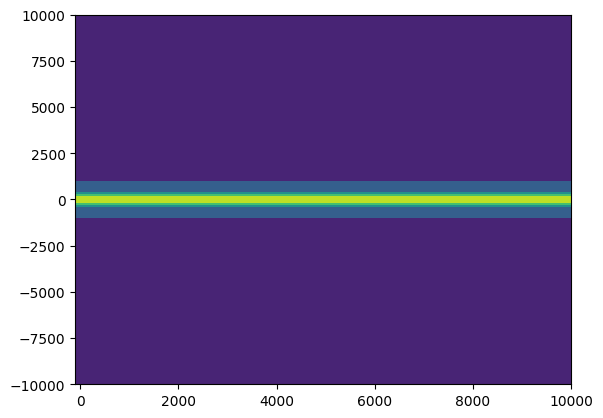

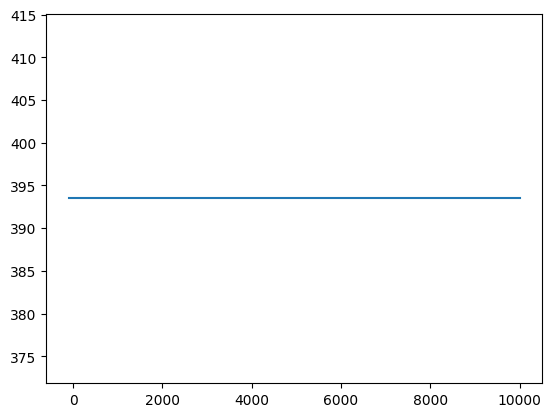

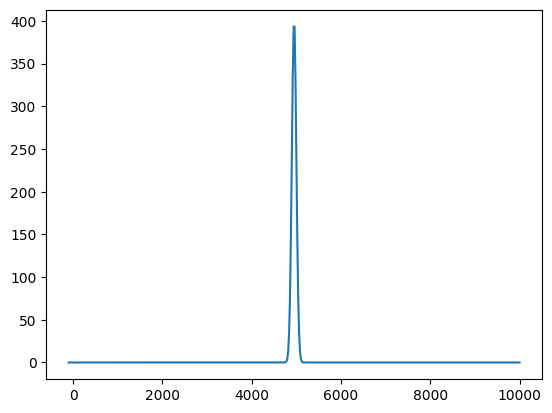

In [82]:
# Criando dominio de modelagem
x = np.linspace(-100,10000,500)
# print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)


# Adotando inputs
classe = 'F'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
sigmaY = 100 # m
sigmaZ = 150 # m
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
#sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHdavidsonBryant(d,vs,u,Ts,Tamb)
    print('deltaH = '+str(deltaH))
    hef = hg+deltaH
    print('A pluma subiu')
else:
    hef = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,H)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])